In [1]:
import xgi
from sod import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from draw import *

In [2]:
dataset = "email-enron"
max_order = 2

H = xgi.load_xgi_data(dataset, max_order=max_order)
H.cleanup()

In [3]:
pos = xgi.pairwise_spring_layout(H, seed=0)
pos = xgi.pca_transform(pos)
sf = H.nodes.local_simplicial_fraction.asnumpy()
es = H.nodes.local_edit_simpliciality.asnumpy()
fes = H.nodes.local_face_edit_simpliciality.asnumpy()

In [13]:
cmap = cm.RdYlGn
cmap.set_bad("lightgrey")
nan_color = "lightgrey"

c_sf = np.empty(H.num_nodes, dtype=object)
for n, s in H.nodes.local_simplicial_fraction.asdict().items():
    c_sf[n] = cmap(s)

c_es = np.empty(H.num_nodes, dtype=object)
for n, s in H.nodes.local_edit_simpliciality.asdict().items():
    c_es[n] = cmap(s)

c_fes = np.empty(H.num_nodes, dtype=object)
for n, s in H.nodes.local_face_edit_simpliciality.asdict().items():
    c_fes[n] = cmap(s)

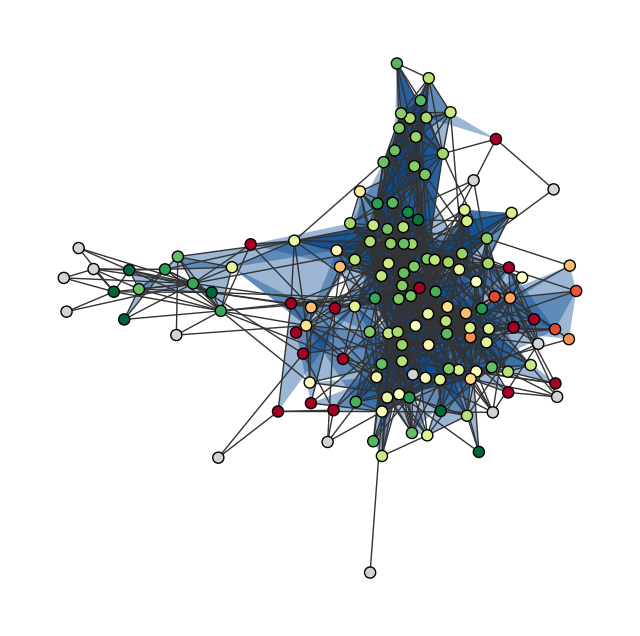

In [12]:
plt.figure(figsize=(8, 8))
xgi.drawing.draw_hyperedges(H, pos, hyperedge_alpha=0.1, zorder=-1, dyad_lw=1, dyad_color='#333')
xgi.drawing.draw_nodes(H, pos, node_size=node_size, node_fc=c_sf, node_fc_cmap=cm, alpha=0.5, zorder=10)
plt.savefig(f"Figures/Fig3/{dataset}_blownup.pdf")

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


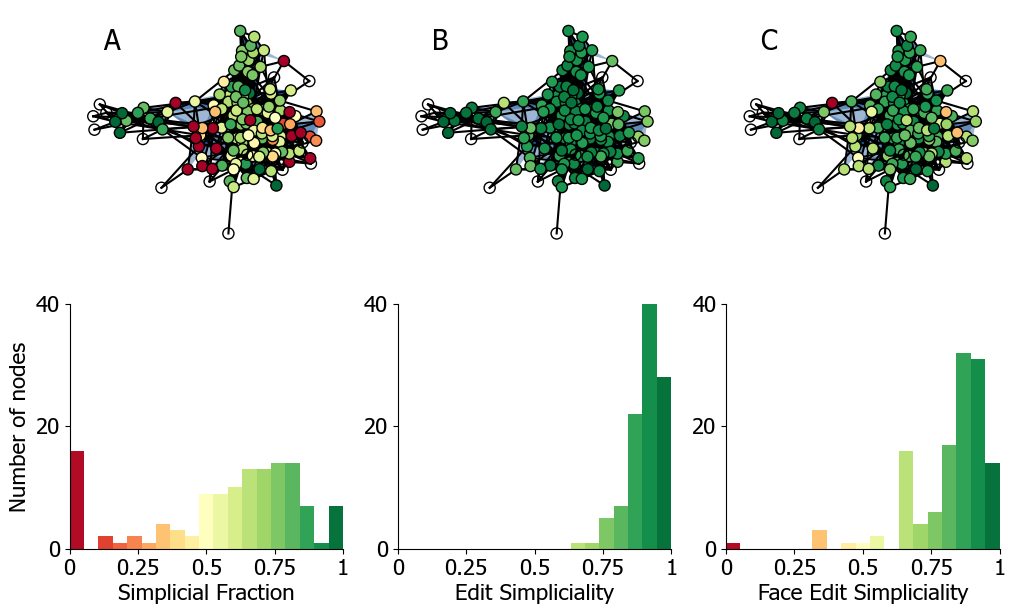

In [10]:
node_size = 8
nbins = 20

set_fonts()

plt.figure(figsize=(12, 7))

plt.subplot(231)
xgi.draw(H, pos, node_fc=c_sf, node_size=node_size)
plt.text(-1.1, 0.6, "A")

plt.subplot(232)
xgi.draw(H, pos, node_fc=c_es, node_size=node_size)
plt.text(-1.1, 0.6, "B")

plt.subplot(233)
xgi.draw(H, pos, node_fc=c_fes, node_size=node_size)
plt.text(-1.1, 0.6, "C")

plt.subplot(234)
n, bins, patches = plt.hist(sf, bins=np.linspace(0, 1, nbins))
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
plt.ylim([0, 40])
plt.yticks([0, 20, 40])
plt.xlabel("Simplicial Fraction")
plt.ylabel("Number of nodes")

bin_centers = 0.5 * (bins[:-1] + bins[1:])

for c, p in zip(bin_centers, patches):
    plt.setp(p, "facecolor", cmap(c))
sns.despine()

plt.subplot(235)
n, bins, patches = plt.hist(es, bins=np.linspace(0, 1, nbins))
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
plt.ylim([0, 40])
plt.yticks([0, 20, 40])
plt.xlabel("Edit Simpliciality")

bin_centers = 0.5 * (bins[:-1] + bins[1:])

for c, p in zip(bin_centers, patches):
    plt.setp(p, "facecolor", cmap(c))
sns.despine()

plt.subplot(236)
n, bins, patches = plt.hist(fes, bins=np.linspace(0, 1, nbins))
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
plt.ylim([0, 40])
plt.yticks([0, 20, 40])
plt.xlabel("Face Edit Simpliciality")

bin_centers = 0.5 * (bins[:-1] + bins[1:])

for c, p in zip(bin_centers, patches):
    plt.setp(p, "facecolor", cmap(c))
sns.despine()

# plt.savefig(f"Figures/Fig3/{dataset}_local_simpliciality.png", dpi=1000)
# plt.savefig(f"Figures/Fig3/{dataset}_local_simpliciality.pdf", dpi=1000)
plt.show()

In [6]:
A = xgi.adjacency_matrix(H, sparse=False, weighted=True)

In [7]:
def pearson(vec, A, weighted=False):
    n = np.size(A, 0)
    x = []
    y = []
    for i in range(n):
        for j in range(i):
            if A[i, j] and not np.isnan(vec[i]) and not np.isnan(vec[j]):
                if weighted:
                    x.extend([vec[i]] * int(A[i, j]))
                    x.extend([vec[j]] * int(A[i, j]))
                    y.extend([vec[j]] * int(A[i, j]))
                    y.extend([vec[i]] * int(A[i, j]))
                else:
                    x.append(vec[i])
                    x.append(vec[j])
                    y.append(vec[j])
                    y.append(vec[i])
    return np.corrcoef(x, y)[0, 1]

In [8]:
print(pearson(sf, A, True))
print(pearson(sf, A, False))

0.3688278596541338
0.2937630328359222


In [9]:
print(pearson(es, A, True))
print(pearson(es, A, False))

0.3102557773434733
0.2562821494220361


In [10]:
print(pearson(fes, A, True))
print(pearson(fes, A, False))

0.21227882617558919
0.16447249537772385
